# Import, GPU Limiting

In [18]:
!pip install tensorflow opencv-python matplotlib
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [19]:
import tensorflow as tf
import os
import cv2
import stat
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.metrics import Precision, BinaryAccuracy
from tensorflow.keras.models import Model

# if using gpus to run ANN, allocates only certain amount of GPU memory towards ANN
gpu_list = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpu_list: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Cleaning Unsupported Images

In [20]:
# directory set to the name of folder containing images
img_directory = 'images_binary' 
for img_class in os.listdir(img_directory): 
    for img in os.listdir(os.path.join(img_directory, img_class)):
        img_path = os.path.join(img_directory, img_class, img)
        type = imghdr.what(img_path)
        # removes image if it is not the correct type
        if type not in ['jpeg','jpg', 'png']: 
            print('Removing image {}'.format(img_path))
            os.chmod(img_path , stat.S_IWRITE)
            os.remove(img_path)

KeyboardInterrupt: 

# Sorting Images for NN

Found 386 files belonging to 2 classes.


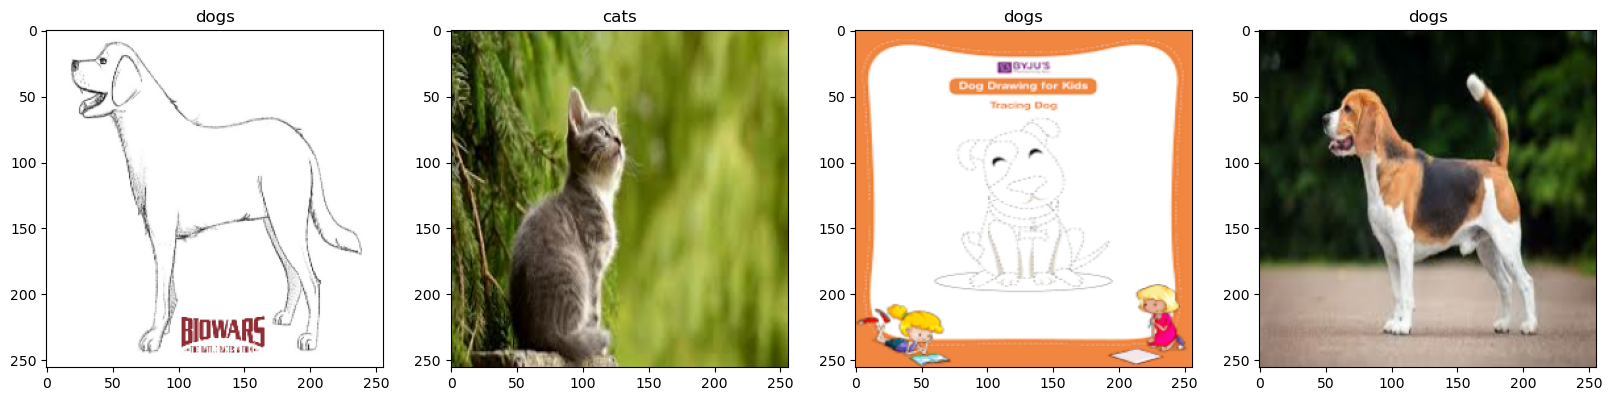

In [ ]:
# converts all images in img_directory to a tf.data.Dataset
images = tf.keras.utils.image_dataset_from_directory('images_binary')
imgs_iterator = images.as_numpy_iterator()

# splitting all images into batches
batch = imgs_iterator.next()
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

# printing 4 example images from batch
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    if (batch[1][index] == 0):
        ax[index].title.set_text('cats')
    else:
        ax[index].title.set_text('dogs')

# Splitting Images for Testing, Training, and Validation

In [ ]:
data = images.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

# calculating sizes for training, testing, and validataion datasets
train_length = int(len(data)*.7)
validation_length = int(len(data)*.2)
test_length = int(len(data)*.1)

# taking images from img_directory for testing, training, validation
training = data.take(train_length)
validation = data.skip(train_length).take(validation_length)
testing = data.skip(train_length + validation_length).take(test_length)

# Creating and Training the Model

In [ ]:
# functional model, 3 layers
input_layer = Input(shape = (256,256,3))
conv_1 = Conv2D(16, (3,3), 1, activation = 'relu')(input_layer)
maxpool_1 = MaxPooling2D()(conv_1)
conv_2 = Conv2D(32, (3,3), 1, activation = 'relu')(maxpool_1)
maxpool_2 = MaxPooling2D()(conv_2)
conv_3 = Conv2D(16, (3,3), 1, activation = 'relu')(maxpool_2)
maxpool_3 = MaxPooling2D()(conv_3)
flatten = Flatten()(maxpool_3)
dense1 = Dense(256, activation='relu')(flatten)

output_layer = Dense(1, activation = 'sigmoid')(dense1)
model = Model(inputs = input_layer, outputs = output_layer)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        462

In [ ]:
# training the model
trained_model = model.fit(training, epochs = 20, validation_data = validation)

Epoch 1/20




9/9 [==============================] - 18s 1s/step - loss: 1.1895 - accuracy: 0.4792 - val_loss: 0.7444 - val_accuracy: 0.4531
Epoch 2/20
9/9 [==============================] - 14s 1s/step - loss: 0.6971 - accuracy: 0.5208 - val_loss: 0.6856 - val_accuracy: 0.7031
Epoch 3/20
9/9 [==============================] - 14s 1s/step - loss: 0.6713 - accuracy: 0.6146 - val_loss: 0.6153 - val_accuracy: 0.7031
Epoch 4/20
9/9 [==============================] - 13s 1s/step - loss: 0.6328 - accuracy: 0.6007 - val_loss: 0.6352 - val_accuracy: 0.6250
Epoch 5/20
9/9 [==============================] - 14s 1s/step - loss: 0.5988 - accuracy: 0.6528 - val_loss: 0.5331 - val_accuracy: 0.7969
Epoch 6/20
9/9 [==============================] - 14s 1s/step - loss: 0.5228 - accuracy: 0.7569 - val_loss: 0.4276 - val_accuracy: 0.8750
Epoch 7/20
9/9 [==============================] - 14s 1s/step - loss: 0.3973 - accuracy: 0.8368 - val_loss: 0.3450 - val_accuracy: 0.8594
Epoch 8/20
9/9 [===========================

# Loss and Accuracy Plotting

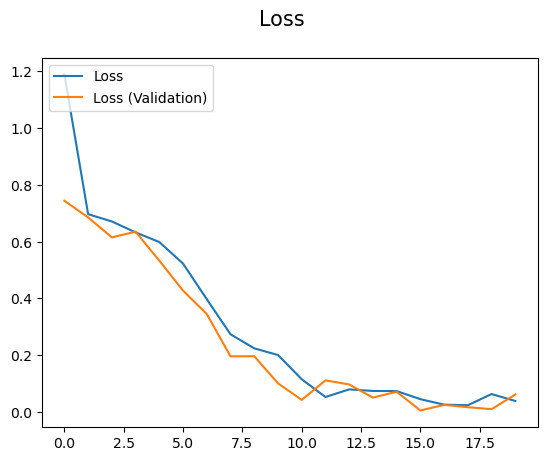

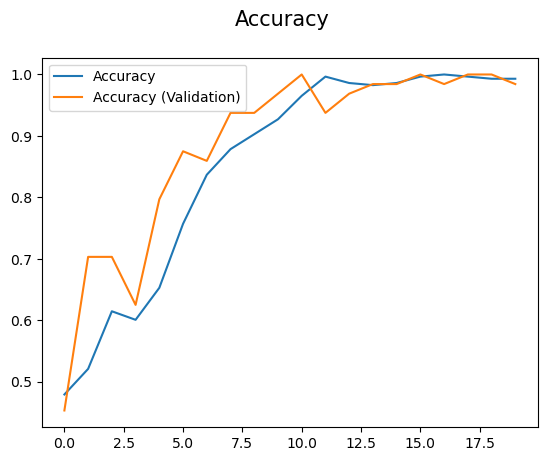

In [ ]:
# plotting loss function
fig = plt.figure()
plt.plot(trained_model.history['loss'], label = 'Loss')
plt.plot(trained_model.history['val_loss'], label = 'Loss (Validation)')
fig.suptitle('Loss', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

# plotting accuracy function
fig = plt.figure()
plt.plot(trained_model.history['accuracy'], label = 'Accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'Accuracy (Validation)')
fig.suptitle('Accuracy', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

# Accuracy and Precision Calculations

In [ ]:
# evaluating accuracy of model using testing dataset
precision = Precision()
accuracy = BinaryAccuracy()
for batch in testing.as_numpy_iterator(): 
    test_images, test_labels = batch
    model_labels = model.predict(test_images)
    precision.update_state(test_labels, model_labels)
    accuracy.update_state(test_labels, model_labels)

# printing precision and accuracy datapoints   
print("Accuracy: {:.2f}".format(accuracy.result()))
print('Precision: {:.2f}'.format(precision.result()))

1/1 [==============================] - 0s 172ms/step
Accuracy: 1.00
Precision: 1.00


# Running Random Image Through NN

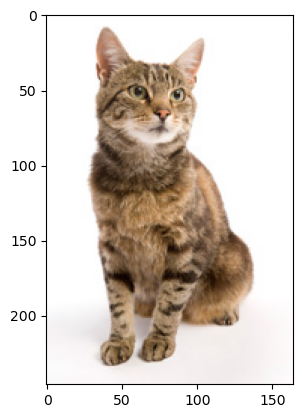

1/1 [==============================] - 0s 99ms/step
Image contains a cat!


In [ ]:
# choose image to determine if cat or dog
test_image = cv2.imread('images_binary\cats\cat.jpg')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

# runs image through model
test_image = tf.image.resize(test_image, (256,256))
pred = model.predict(np.expand_dims(test_image/255, 0))

# turns binary classification output into cat/dog determination
if pred > 0.5: 
    print(f'Image contains a dog!')
else:
    print(f'Image contains a cat!')